<a href="https://colab.research.google.com/github/lukaszek358/SDA/blob/main/projekt_ko%C5%84cowy_modelowanie_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Modelowanie

In [20]:
import sklearn
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.metrics import r2_score, mean_squared_error

from sklearn.model_selection import KFold #metoda walidacji krzyżowej, która dzieli zbiór danych na k podzbiorów o równej liczbie obserwacji

from sklearn.model_selection import cross_val_score #automatycznie wykonuje walidację krzyżową dla modelu i zestawu danych
from sklearn.model_selection import GridSearchCV #import biblioteki dla doboru optymalnych parametrów

from sklearn.preprocessing import PolynomialFeatures #import biblioteki regresji wielomianowej
from sklearn.linear_model import LinearRegression #import biblioteki regresji liniowej

from sklearn.tree import DecisionTreeRegressor #import biblioteki dla drzew decyzyjnych
from sklearn import tree #import modelu drzewa

In [3]:
data = pd.read_csv('/content/drive/MyDrive/preprocessing_flights.csv')
data=data.drop('Unnamed: 0', axis = 1)

In [4]:
sample_size = 20000

In [5]:
sampled_data = data.sample(n= sample_size, random_state = 42)

In [6]:
sampled_data

,date,scheduled_departure,departure_delay,taxi_out,wheels_off,scheduled_time,distance,scheduled_arrival,arrival_delay,airline,...,airline_Delta Air Lines Inc.,airline_Frontier Airlines Inc.,airline_Hawaiian Airlines Inc.,airline_JetBlue Airways,airline_Skywest Airlines Inc.,airline_Southwest Airlines Co.,airline_Spirit Air Lines,airline_US Airways Inc.,airline_United Air Lines Inc.,airline_Virgin America
5142765,2015-03-26,851,3.0,15.0,869,217.0,1330,1068,-23.0,Atlantic Southeast Airlines,...,0,0,0,0,0,0,0,0,0,0
3901978,2015-07-03,405,-6.0,11.0,410,90.0,495,435,-4.0,Southwest Airlines Co.,...,0,0,0,0,0,1,0,0,0,0
1709905,2015-09-25,360,-11.0,12.0,361,73.0,273,433,-23.0,JetBlue Airways,...,0,0,0,1,0,0,0,0,0,0
4853679,2015-07-01,1278,13.0,15.0,1306,105.0,528,1383,9.0,Atlantic Southeast Airlines,...,0,0,0,0,0,0,0,0,0,0
2891404,2015-11-23,1153,-6.0,23.0,1170,161.0,1075,1374,4.0,Skywest Airlines Inc.,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3945568,2015-07-31,690,-4.0,11.0,697,135.0,861,885,-8.0,Southwest Airlines Co.,...,0,0,0,0,0,1,0,0,0,0
3209907,2015-04-16,455,-4.0,13.0,464,60.0,223,515,-4.0,Southwest Airlines Co.,...,0,0,0,0,0,1,0,0,0,0
2234333,2015-02-21,385,-5.0,16.0,396,204.0,1431,709,-18.0,American Airlines Inc.,...,0,0,0,0,0,0,0,0,0,0
740211,2015-02-28,379,-9.0,11.0,381,101.0,588,540,-1.0,Delta Air Lines Inc.,...,1,0,0,0,0,0,0,0,0,0


In [14]:
X = sampled_data.drop(['date', 'arrival_delay', 'airline'], axis=1)
y = sampled_data['arrival_delay']

In [15]:
X.head()

,scheduled_departure,departure_delay,taxi_out,wheels_off,scheduled_time,distance,scheduled_arrival,scheduled_departure_norm,cos_scheduled_departure_norm,day_of_week_norm,...,airline_Delta Air Lines Inc.,airline_Frontier Airlines Inc.,airline_Hawaiian Airlines Inc.,airline_JetBlue Airways,airline_Skywest Airlines Inc.,airline_Southwest Airlines Co.,airline_Spirit Air Lines,airline_US Airways Inc.,airline_United Air Lines Inc.,airline_Virgin America
5142765,851,3.0,15.0,869,217.0,1330,1068,3.713188,-8.410390e-01,3.590392,...,0,0,0,0,0,0,0,0,0,0
3901978,405,-6.0,11.0,410,90.0,495,435,1.767146,-1.950903e-01,4.487990,...,0,0,0,0,0,1,0,0,0,0
1709905,360,-11.0,12.0,361,73.0,273,433,1.570796,6.123234e-17,4.487990,...,0,0,0,1,0,0,0,0,0,0
4853679,1278,13.0,15.0,1306,105.0,528,1383,5.576327,7.604060e-01,2.692794,...,0,0,0,0,0,0,0,0,0,0
2891404,1153,-6.0,23.0,1170,161.0,1075,1374,5.030912,3.131638e-01,0.897598,...,0,0,0,0,1,0,0,0,0,0


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor()

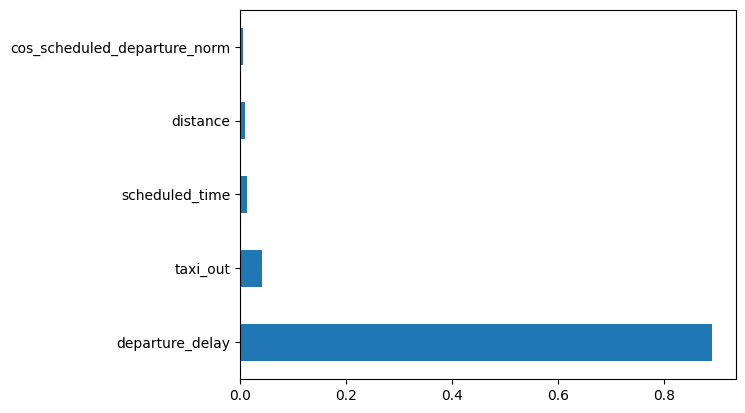

In [19]:
model.feature_importances_

feat_importances = pd.Series(model.feature_importances_, index=X_train.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

In [23]:
kf = GridSearchCV(model,
                  param_grid = {'max_depth': range(1, 15),
                  'min_samples_split': range(2, 100, 20)
                  },
                  cv = 10, 
                  scoring = 'r2',
                  error_score= 'raise' )
kf.fit(X_train, y_train)

print(kf.best_params_)
print(kf.best_score_)

{'max_depth': 6, 'min_samples_split': 2}
0.9032455597770583


II podejście

In [24]:
sample_size = 25000
sampled_data = data.sample(n= sample_size, random_state = 42)

X = sampled_data.drop(['date' ,'arrival_delay', 'airline', 'scheduled_departure', 'wheels_off'], axis=1)
y = sampled_data['arrival_delay']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
kf = GridSearchCV(model,
                  param_grid = {'max_depth': range(1, 25),
                  'min_samples_split': range(10, 150, 10)
                  },
                  cv = 15, 
                  scoring = 'r2')
kf.fit(X_train, y_train)

print(kf.best_params_)
print(kf.best_score_)

{'max_depth': 6, 'min_samples_split': 20}
0.8898446039093239
